# Main Kernel

This is the main kernel of FDA homework 1

# Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plaintext review. We also have reviews from all other Amazon categories.

For dataset view [here](https://drive.google.com/file/d/1JUM5y1o4hYdZIioy2gN-I22a8673S6Pt/view?usp=sharing)

Origin problem view [here](https://www.kaggle.com/snap/amazon-fine-food-reviews)


# Steps

Load dataset first.

Only use the first 10000 rows in this homework

**Because dataset is too large, I use .gitignore to exclude it from commiting**


In [2]:
import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

# import local file
import os 


In [3]:
# Read data
data_path = "./Reviews.csv"

df = pd.read_csv(data_path)
df = df[:10000]

# Drop unnecessary data
df=df.drop(["ProductId","Text","Summary"],axis=1)

df.head()


,Id,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
0,1,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400
1,2,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000
2,3,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600
3,4,A395BORC6FGVXV,Karl,3,3,2,1307923200
4,5,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600


## Get top 10 user

Use UserId and ProfileName and group together

then count and appearance time and resort by count

In [4]:
top10=df[['UserId','ProfileName']].groupby(['UserId'])['ProfileName'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)[:10]

# restore ProfileName
profileNameList=[]
for item in top10["UserId"]:
    profileNameList.append(df.loc[df["UserId"]==item][:1]["ProfileName"].values[0])

top10['ProfileName'] = pd.Series(profileNameList, index=top10.index)

# change count to score count
top10["score count"]=top10["count"]
top10=top10.drop(["count"],axis=1)

# add score mean list
def getReviewMean(UserId):
    temp=df.loc[df["UserId"]==UserId]
    sum=temp["Score"].sum(skipna=True)
    
    return sum/len(temp)

scoreMeanList=[]

for item in top10["UserId"]:
    scoreMeanList.append(getReviewMean(item))

top10['score mean'] = pd.Series(scoreMeanList, index=top10.index)
top10.style.hide_index()    

UserId,ProfileName,score count,score mean
A1Z54EM24Y40LL,c2,17,3.88235
A2SZLNSI5KOQJT,"Carrie, ""Formerly ""Sister Carrie""""",10,3.8
A35R32TA60XD57,M. Torma,9,4.11111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.42857
A3NHUQ33CFH3VM,Citizen John,7,3.14286
A3PJZ8TU8FDQ1K,Jared Castle,7,4.71429
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.66667
A26NFIQ7KWI8Y7,kt rose,6,2.66667
A10H24TDLK2VDP,William Jens Jensen,6,3


## Plot Review

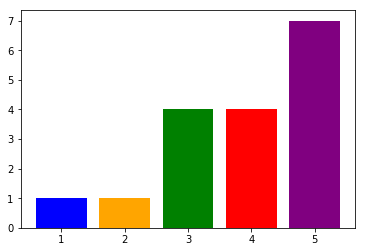

In [5]:
# plot review of single user
def plotReview(viewer):
    userID=str(viewer["UserId"].values[0])

    review=df[df['UserId'].str.contains(userID)]["Score"]
    x=review.value_counts().index.tolist()
    y=review.value_counts().values.tolist()
    plt.bar(x,y,color=('purple','red','green','orange','blue'))
    
# argument is a row of df
plotReview(top10[:1])


## Plot year bar chart

Make a function to make things easier

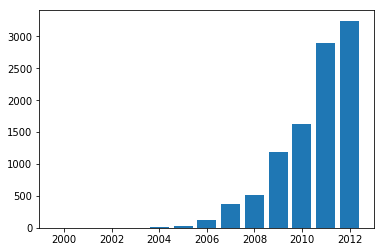

In [6]:
# plot vote times of each year

def plotYear(start,end):
    Dates=pd.to_datetime(df['Time'], unit='s')
    x=range(start,end+1)
    y=[]
    for item in x:
        start_date = '01-01-'+str(item)
        end_date = '12-31-'+str(item)
        mask = (Dates >= start_date) & (Dates <= end_date)
        y.append(len(df.loc[mask].index))
    plt.bar(x,y)

# argument is startDate,endDate
plotYear(2000,2012)    

## Plot heatmap

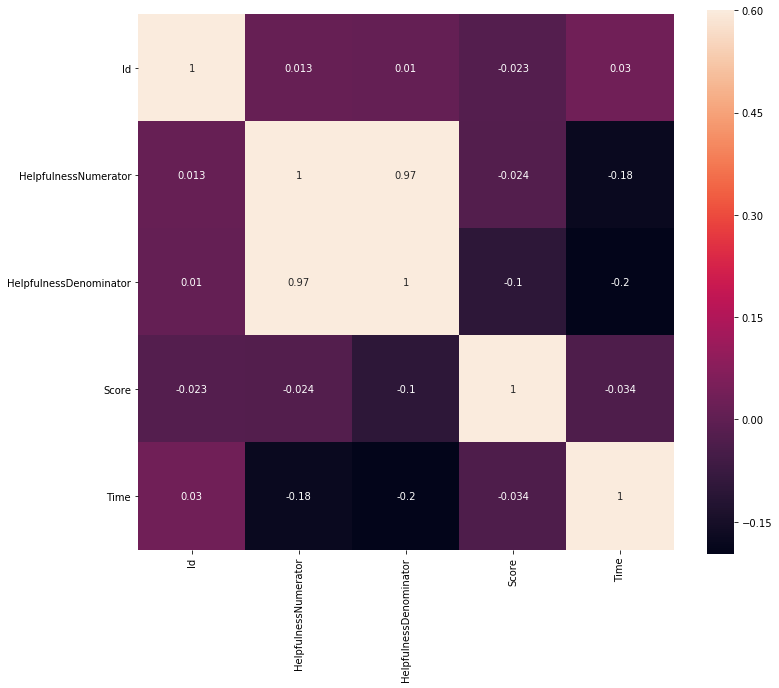

In [7]:
plt.figure(figsize=(12,10))
heatmap=sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)


# Calculate helpful percent

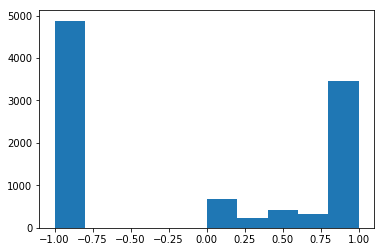

In [8]:
helpfulPercent=[]

#iterate through index
for index, row in df.iterrows():
    if row["HelpfulnessNumerator"]==0 and row["HelpfulnessDenominator" ]==0:
        helpfulPercent.append(-1)
    elif row["HelpfulnessNumerator"]==0:
        helpfulPercent.append(0)
    else:
        helpfulPercent.append(row["HelpfulnessNumerator"]/row["HelpfulnessDenominator" ])

plt.hist(helpfulPercent)
plt.show()